In [252]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

from mpl_toolkits.mplot3d import axes3d

### Part 1

(A). The shape of the level curves of T is a Circle. 

(B). (0,0) - the center - is the hottest point on the plane due to the temperature being inversely proportion to the square of distance from the center. 
Based on the below calculations, at the hottest point on the plane (0,0), the temperature is 100 degrees. 

In [253]:
def calculateTemp(x,y):
    temp = 100/(x**2 + y**2 + 1)
    return temp

hottestTemp = calculateTemp(0,0)
hottestTemp

100.0

(C). Based on the below calculations, the direction of the greatest increase in temperature at point (3,2) is about (-3.061, -2.041). The greatest increase in magnitude is approximately 3.679.

In [254]:
def calcGrad(x,y):
    gradient = (-200*x / (x**2 + y**2 + 1)**2, -200*y / (x**2 + y**2 + 1)**2)
    return gradient

increase = calcGrad(3,2)
increase

(-3.061224489795918, -2.0408163265306123)

In [255]:
def calcMagn(x,y):
    magnitude = math.sqrt(x**2 + y**2)
    return magnitude

increase_magn = calcMagn(increase[0], increase[1])
increase_magn

3.6791339545550907

(D). Based on the below calculations, the direction of greatest decrease in temperature at point (3,2) is about (3.061, 2.041)

In [256]:
-1*calcGrad(3, 2)[0], -1* calcGrad(3, 2)[1]

(3.061224489795918, 2.0408163265306123)

(E). A direction at point (3,2) in which the temperature does not increase or decrease would mean there is no temperature change. This means the dot product must be 0. 

As our gradient is (-3.061, -2.041), a direction could be (2.041, 3.061).

### Part 2

(A). 
$\frac{\partial f}{\partial x} = 20xy - 10x - 4x^3$ 

$\frac{\partial f}{\partial y} = 10x^2 - 8y - 8y^3$

Solving these two equations gives us these points:

(x, y) = (-2.644, 1.898)

(x, y) = (-0.856, 0.646)

(x, y) = (0, 0)

(x, y) = (0.856, 0.646)

(x, y) = (2.644, 1.898)

$\frac{\partial f}{\partial x^2} = 20y - 10 - 12x^2$

$\frac{\partial^2 f}{\partial xy} = 20x$

$\frac{\partial^2 f}{\partial y^2} = -8 - 24y^2$

$\frac{\partial^2 f}{\partial yx} = 20x$

Using the above second derivative values and a hessian, 

(x, y) = (-2.644, 1.898) is Maximum

(x, y) = (-0.856, 0.646) is Saddle point

(x, y) = (0, 0) is Maximum

(x, y) = (0.856, 0.646) is Saddle point

(x, y) = (2.644, 1.898) is Maximum

In [257]:
def fxn(x, y):
    return 10*x**2 * y - 5*x**2 - 4* y**2 - x**4 - 2*y**4

In [258]:
fxn(-2.644, 1.898)

8.495854299872011

In [259]:
fxn(-0.856, 0.646)

-1.4846767734079995

In [260]:
fxn(0, 0)

0

In [261]:
fxn(0.856, 0.646)

-1.4846767734079995

In [262]:
fxn(2.644, 1.898)

8.495854299872011

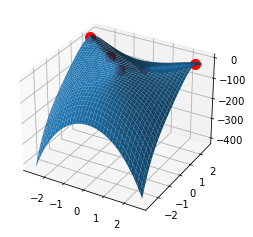

In [263]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-2.7, 2.7, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([func(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)
ax.plot(-2.644, 1.898, func(-2.644, 1.898), marker='o', color='r', markersize="10")
ax.plot(0, 0, func(0, 0),  marker='o', color='r', markersize="10")
ax.plot(-0.856, 0.646, func(-2.644, 1.898),  marker='o', color='r', markersize="10")
ax.plot(0.856, 0.646, func(0.856, 0.646),  marker='o', color='r', markersize="10")
ax.plot(2.644, 1.898, func(2.644, 1.898),  marker='o', color='r', markersize="10")

plt.show()

### Part 3

By performing Laplace Expansion over the i=1 row, we retrieve simplar results to the determinant of A.

In [264]:
A = [[2, 1, 2, 6],
    [6, 4, 3, 5],
    [8, 1, 4, 9],
    [9, 8, 7, 8]]

In [265]:
det = 0
for j in range(4):
    det = det + (-1)**(1+j) * A[1][j] * np.linalg.det(np.delete(np.delete(A, 1, 0), j, 1))
    
det

228.99999999999994

In [266]:
np.linalg.det(A)

229.00000000000028

### Part 4

Solving this we get the characteristic equation as $-λ^3+6λ^2-10λ+4$

This will give roots as $λ=2,\:λ=2+\sqrt{2},\:λ=2-\sqrt{2}$

The roots itself are the eigen values for the matrix A

For a matrix to be positive definite, all it's eigen values should be positive. In the case of matrix A values are greater than 0, making matrix A definite.

Additionally, the condition number of A is 5.8284271247461925.

In [267]:
A = [[2, -1, 0],
    [-1, 2, -1],
    [0, -1, 2]]

In [268]:
np.linalg.cond(A)

5.8284271247461925

### Part 5

In [269]:
A = np.array([[6, 5, 3],
    [4, 1, 5],
    [6, 3, 6],
    [5, 3, 6],
    [6, 6, 3]])

(A). The below calculation shows that the singular values of A are [17.92667464,  4.69961929,  0.74021274]

In [270]:
u, singVals, vh = np.linalg.svd(A)

In [271]:
singVals

array([17.92667464,  4.69961929,  0.74021274])

(B)The below calculations show the eigenvalues and how they are eigenvalues related
to the singular values of A

In [272]:
A_transpose = A.transpose()
eigenVal, eigenVect = np.linalg.eig(A_transpose @ A)

eigenVal

array([321.36566366,   0.54791491,  22.08642144])

(C). The rank of matrix A is 3.

In [273]:
np.linalg.matrix_rank(A)

3

(D). Yes, there exists a unique solution since A has a full-rank

(E). Below calculation shows the minimizing x.

In [274]:
b = np.array([-1, 2, 0, 3, 1])
np.linalg.lstsq(A, b, rcond=None)

(array([-2.06119825,  1.37336076,  1.54641296]),
 array([2.62766778]),
 3,
 array([17.92667464,  4.69961929,  0.74021274]))

### Part 6

In [275]:
def gradient_dot_product(A, B, x):
    return (A.T @ B + B.T @ A) @ x

def hessian_dot_product(A, B):
    return A.T @ B + B.T @ A

In [276]:
n = 3
A = np.random.rand(n, n)
B = np.random.rand(n, n)
x = np.random.rand(n)

gradient = gradient_dot_product(A, B, x)
hessian = hessian_dot_product(A, B)

print("Gradient:", gradient)
print("Hessian:", hessian)

Gradient: [1.80473731 1.73276484 1.3121864 ]
Hessian: [[1.68234592 2.08257148 1.89999226]
 [2.08257148 1.95368595 1.72423866]
 [1.89999226 1.72423866 1.05740697]]


### Part 7

In [277]:
x = pd.read_csv("X.csv")
y = pd.read_csv("y.csv")

In [278]:
X = x.to_numpy()
y = y.to_numpy()

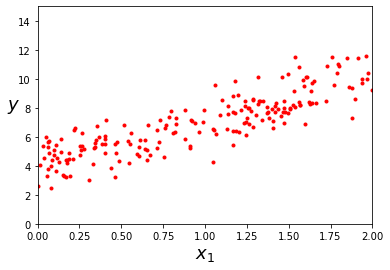

In [279]:
plt.plot(X, y, "b.", color="red")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [280]:
Xb = np.c_[np.ones((len(X), 1)), X]
theta = np.linalg.inv(Xb.T.dot(Xb)).dot(Xb.T).dot(y)
theta

array([[4.03111343],
       [3.01728673]])

In [281]:
Xnew = np.array([[0], [2]])
Xnewb = np.c_[np.ones((2, 1)), Xnew]
y_pred = Xnewb.dot(theta)
y_pred

array([[ 4.03111343],
       [10.06568688]])

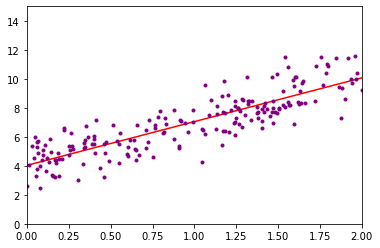

In [282]:
plt.plot(Xnew, y_pred, "r-", color="red")
plt.plot(X, y, "b.", color="purple")
plt.axis([0, 2, 0, 15])
plt.show()

#### Batch Size = 1

In [283]:
thetaPath= []

m = len(Xb)

itrs = 50
mbsize = 1

np.random.seed(42)
theta_new = np.random.randn(2,1) 

t0, t1 = 200, 1000
def learnsch(t):
    return t0 / (t + t1)

t = 0
for epoch in range(itrs):
    shuffInd = np.random.permutation(m)
    X_b_shuffled = Xb[shuffInd]
    y_shuffled = y[shuffInd]
    for i in range(0, m, mbsize):
        t += 1
        
        xi = X_b_shuffled[i:i+mbsize]
        yi = y_shuffled[i:i+mbsize]
        
        gradients = 2/mbsize * xi.T.dot(xi.dot(theta_new) - yi)
        eta = learnsch(t)
        
        theta_new = theta_new - eta * gradients
        thetaPath.append(theta_new)
theta_new

array([[4.09567744],
       [3.02036801]])

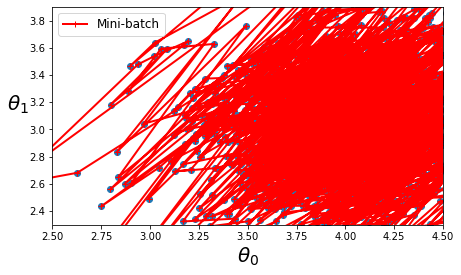

In [284]:
thetaPath = np.array(thetaPath)

plt.figure(figsize=(7,4))
plt.plot(thetaPath[:, 0], thetaPath[:, 1], "g-+", linewidth=2, label="Mini-batch", color="red")
plt.scatter(thetaPath[:, 0], thetaPath[:, 1])
plt.legend(loc="upper left", fontsize=12)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

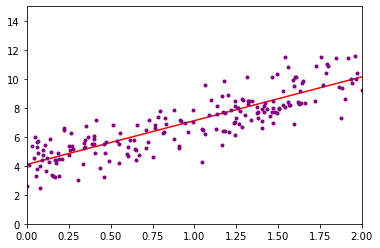

In [285]:
Xnew = np.array([[0], [2]])
Xnewb = np.c_[np.ones((2, 1)), Xnew]
y_pred = Xnewb.dot(theta_new)
plt.plot(Xnew, y_pred, "r-", color="red")
plt.plot(X, y, "b.", color="purple")
plt.axis([0, 2, 0, 15])
plt.show()

#### Batch Size = 5

In [286]:
thetaPath= []

m = len(Xb)

itrs = 50
mbsize = 5

np.random.seed(42)
theta_new = np.random.randn(2,1) 

t0, t1 = 200, 1000
def learnsch(t):
    return t0 / (t + t1)

t = 0
for epoch in range(itrs):
    shuffInd = np.random.permutation(m)
    X_b_shuffled = Xb[shuffInd]
    y_shuffled = y[shuffInd]
    for i in range(0, m, mbsize):
        t += 1
        
        xi = X_b_shuffled[i:i+mbsize]
        yi = y_shuffled[i:i+mbsize]
        
        gradients = 2/mbsize * xi.T.dot(xi.dot(theta_new) - yi)
        eta = learnsch(t)
        
        theta_new = theta_new - eta * gradients
        thetaPath.append(theta_new)
theta_new

array([[4.091022  ],
       [3.01998581]])

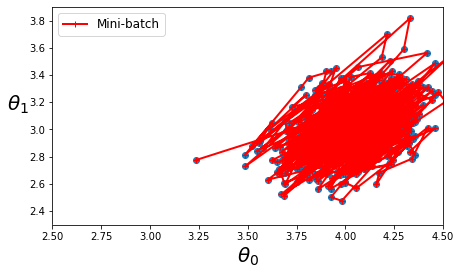

In [287]:
thetaPath = np.array(thetaPath)

plt.figure(figsize=(7,4))
plt.plot(thetaPath[:, 0], thetaPath[:, 1], "g-+", linewidth=2, label="Mini-batch", color="red")
plt.scatter(thetaPath[:, 0], thetaPath[:, 1])
plt.legend(loc="upper left", fontsize=12)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

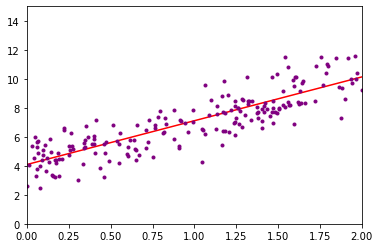

In [288]:
Xnew = np.array([[0], [2]])
Xnewb = np.c_[np.ones((2, 1)), Xnew]
y_pred = Xnewb.dot(theta_new)
plt.plot(Xnew, y_pred, "r-", color="red")
plt.plot(X, y, "b.", color="purple")
plt.axis([0, 2, 0, 15])
plt.show()

#### Batch Size = 10

In [289]:
thetaPath= []

m = len(Xb)

itrs = 50
mbsize = 10

np.random.seed(42)
theta_new = np.random.randn(2,1) 

t0, t1 = 200, 1000
def learnsch(t):
    return t0 / (t + t1)

t = 0
for epoch in range(itrs):
    shuffInd = np.random.permutation(m)
    X_b_shuffled = Xb[shuffInd]
    y_shuffled = y[shuffInd]
    for i in range(0, m, mbsize):
        t += 1
        
        xi = X_b_shuffled[i:i+mbsize]
        yi = y_shuffled[i:i+mbsize]
        
        gradients = 2/mbsize * xi.T.dot(xi.dot(theta_new) - yi)
        eta = learnsch(t)
        
        theta_new = theta_new - eta * gradients
        thetaPath.append(theta_new)
theta_new

array([[4.08716938],
       [3.048975  ]])

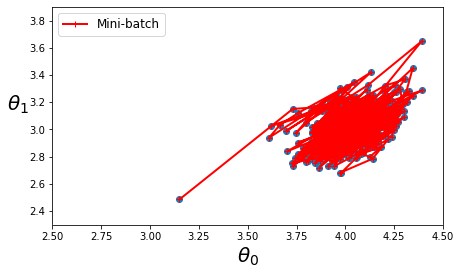

In [290]:
thetaPath = np.array(thetaPath)

plt.figure(figsize=(7,4))
plt.plot(thetaPath[:, 0], thetaPath[:, 1], "g-+", linewidth=2, label="Mini-batch", color="red")
plt.scatter(thetaPath[:, 0], thetaPath[:, 1])
plt.legend(loc="upper left", fontsize=12)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

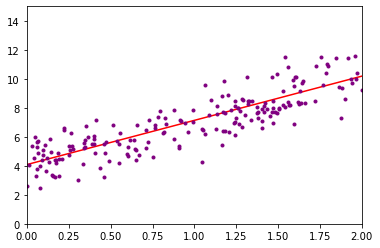

In [291]:
Xnew = np.array([[0], [2]])
Xnewb = np.c_[np.ones((2, 1)), Xnew]
y_pred = Xnewb.dot(theta_new)
plt.plot(Xnew, y_pred, "r-", color="red")
plt.plot(X, y, "b.", color="purple")
plt.axis([0, 2, 0, 15])
plt.show()